# Implementação da Atividade de Inteligência Artificial

**Universidade de Pernambuco**  
**Escola Politécnica de Pernambuco**  
**Disciplina:** Projeto Prático  
**Professor:** Prof. Dr. João Fausto  
**Turma:** IA

---
### Alunos

- André Sampaio
- Rafael Lima
- Ruan de Melo
- Sócrates Farias
- Vinícius Ribeiro

---



Dependências:

In [ ]:
# Instalar biblioteca para SMOTE
!pip install imbalanced-learn

## Amostra da base de dados

Importação pelo google sheets:

In [ ]:
import pandas as pd

# URLs formatadas para exportar como CSV
url_orig  = 'https://docs.google.com/spreadsheets/d/1FT_507zIRiVp89OtuqmGSSQcjzvqd8vThO01BjyO87Q/export?format=csv'
url_trans = 'https://docs.google.com/spreadsheets/d/1m-XvHVxr1u6A9QrIGsNemQUVcpd1084nftcwk36gUiw/export?format=csv'

# Leitura com pandas
df_orig = pd.read_csv(url_orig)
df_trans = pd.read_csv(url_trans)


In [ ]:
# Exibir os 10 primeiros registros de cada DataFrame
print("📄 Dados Originais (df_orig):")
df_orig.head(10)

📄 Dados Originais (df_orig):


,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment
5,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,No Sports,...,4,5,5,3,3,5,5,5,5,"Religious Activities, Social Connections, Onli..."
6,Male,26,PU,Postgraduate,Data Science,1st year,2.5-3.0,On-Campus,Yes,1-3 times,...,4,4,4,5,2,5,4,4,5,"Social Connections, Online Entertainment"
7,Male,22,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,4,4,5,4,3,2,2,4,"Religious Activities, Social Connections, Onli..."
8,Male,20,COMSATS,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,Yes,1-3 times,...,3,4,3,4,2,3,4,3,5,"Religious Activities, Social Connections, Onli..."
9,Male,23,COMSATS,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,No Sports,...,3,5,3,5,1,5,5,5,5,Sports and Fitness


In [ ]:
print("\n📄 Dados Transformados (df_trans):")
df_trans.head(10)


📄 Dados Transformados (df_trans):


,gender_M,gender_F,age,university_PU,university_UET,university_FAST,university_COMSATS,university_NUST,university_VU,university_UMT,...,isolation,future_insecurity,Creative Outlets,Nothing,Online Entertainment,Outdoor Activities,Religious Activities,Sleep,Social Connections,Sports and Fitness
0,1,0,20,1,0,0,0,0,0,0,...,1,2,0,0,1,0,1,0,1,0
1,1,0,20,0,1,0,0,0,0,0,...,3,4,0,0,1,0,0,0,0,0
2,1,0,20,0,0,1,0,0,0,0,...,3,1,0,0,1,0,1,0,0,1
3,1,0,20,0,1,0,0,0,0,0,...,5,3,0,0,1,0,0,0,0,0
4,0,1,20,0,1,0,0,0,0,0,...,4,4,0,0,1,0,0,0,0,0
5,0,1,20,0,1,0,0,0,0,0,...,5,5,0,0,1,0,1,0,1,0
6,1,0,26,1,0,0,0,0,0,0,...,4,5,0,0,1,0,0,0,1,0
7,1,0,22,1,0,0,0,0,0,0,...,2,4,0,0,1,0,1,0,1,0
8,1,0,20,0,0,0,1,0,0,0,...,3,5,0,0,1,1,1,0,1,0
9,1,0,23,0,0,0,1,0,0,0,...,5,5,0,0,0,0,0,0,0,1


# Primeira etapa:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
)

from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE


# Importar base transformada do Google Sheets
url_trans = 'https://docs.google.com/spreadsheets/d/1m-XvHVxr1u6A9QrIGsNemQUVcpd1084nftcwk36gUiw/export?format=csv'
df = pd.read_csv(url_trans)

print(f"Base carregada com {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head()


Base carregada com 87 linhas e 56 colunas.


,gender_M,gender_F,age,university_PU,university_UET,university_FAST,university_COMSATS,university_NUST,university_VU,university_UMT,...,isolation,future_insecurity,Creative Outlets,Nothing,Online Entertainment,Outdoor Activities,Religious Activities,Sleep,Social Connections,Sports and Fitness
0,1,0,20,1,0,0,0,0,0,0,...,1,2,0,0,1,0,1,0,1,0
1,1,0,20,0,1,0,0,0,0,0,...,3,4,0,0,1,0,0,0,0,0
2,1,0,20,0,0,1,0,0,0,0,...,3,1,0,0,1,0,1,0,0,1
3,1,0,20,0,1,0,0,0,0,0,...,5,3,0,0,1,0,0,0,0,0
4,0,1,20,0,1,0,0,0,0,0,...,4,4,0,0,1,0,0,0,0,0


### Variáveis alvo e análise inicial

criticidade_cat
Moderada    0.367816
Baixa       0.333333
Alta        0.298851
Name: proportion, dtype: float64
                gender_M  gender_F   age  university_PU  university_UET
gender_M            0.20     -0.20  0.17          -0.03           -0.03
gender_F           -0.20      0.20 -0.17           0.03            0.03
age                 0.17     -0.17  2.64          -0.18            0.01
university_PU      -0.03      0.03 -0.18           0.23           -0.07
university_UET     -0.03      0.03  0.01          -0.07            0.10


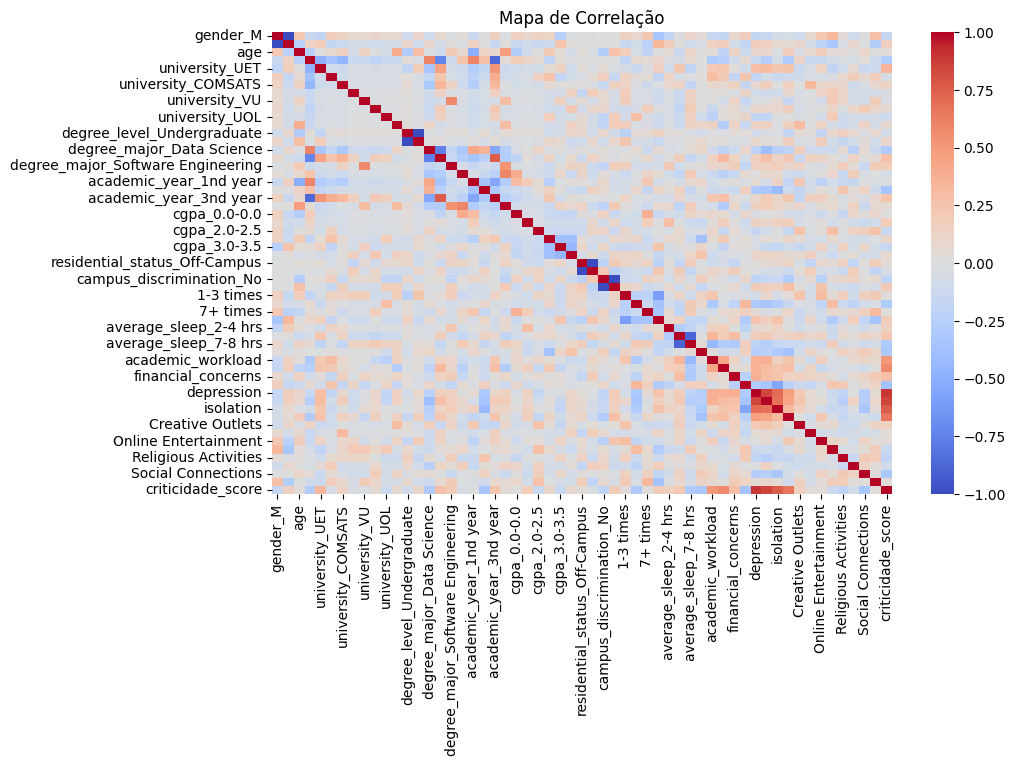

In [ ]:
# Criar criticidade_score e categorizar
df['criticidade_score'] = (
    df['depression'] + df['anxiety'] + df['isolation'] + df['future_insecurity'] +
    (10 - df['Sleep']) + (10 - df['Social Connections']) +
    df['academic_pressure'] + df['academic_workload']
)
p1, p2 = df['criticidade_score'].quantile([0.33, 0.66])
df['criticidade_cat'] = pd.cut(df['criticidade_score'], [-1, p1, p2, df['criticidade_score'].max()+1],
                                labels=['Baixa', 'Moderada', 'Alta'])

# Análise de distribuição e covariância
print(df['criticidade_cat'].value_counts(normalize=True))
print(df.cov(numeric_only=True).round(2).iloc[:5, :5])

# Correlação
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Mapa de Correlação")
plt.show()

### Normalização e separação de dados

In [ ]:
# Normalizar colunas numéricas
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and set(df[col].unique()) <= {0, 1}]
target_cols = ['criticidade_score', 'criticidade_cat']
numeric_cols = [col for col in df.columns if col not in binary_cols + target_cols]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Separar X e y
X = df.drop(columns=target_cols)
y_class = df['criticidade_cat']
y_reg = df['criticidade_score']


### Divisão treino/validação/teste e SMOTE

In [ ]:
# 70/15/15 com estratificação
X_temp, X_test, y_class_temp, y_class_test, y_reg_temp, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.15, stratify=y_class, random_state=42)

X_train, X_val, y_class_train, y_class_val, y_reg_train, y_reg_val = train_test_split(
    X_temp, y_class_temp, y_reg_temp, test_size=0.176, stratify=y_class_temp, random_state=42)

# SMOTE para balancear classificação
sm = SMOTE(random_state=42)
X_train_class_bal, y_class_train_bal = sm.fit_resample(X_train, y_class_train)

# Codificação dos rótulos de classificação
le = LabelEncoder()
y_class_train_bal = le.fit_transform(y_class_train_bal)
y_class_test = le.transform(y_class_test)

### Treinamento dos modelos e métricas

In [ ]:
# Definir modelos
# KNN com GridSearchCV (otimizando k, métrica e peso)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid_knn = {
    'knn__n_neighbors': [5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='f1_macro')

# Random Forest com mais hiperparâmetros
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    cv=5, scoring='f1_macro'
)

# ELM como Pipeline com Ridge Regression
elm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=0.5))
])
#OBS Sobre o ELM(Ridge):
'''
O Ridge Regression é uma variação da regressão linear que inclui uma
regularização L2. O intuito do uso dele aqui no código é para poder
simular o ELM onde basicamente o valor contínuo gerado por ele acaba
sendo arredondado para (0,1,2) que vai ser utilizado como o "classificador".

'''


# RBFN simulada com SVR radial
rbfn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.2))
])

#OBS Sobre o RBFN(SVR):
'''
O SVR é a versão para regressão do SVM (Support Vector Machine).
No código o SVR com kernel RBF(radial) foi utilizado para simular o RBFN,,
onde: Após a previsão contínua, arredonda-se o valor para 0, 1 ou 2,
simulando a classificação em criticidade_cat.
'''

#OBS Sobre usar as simulaçoes para classificar:
'''
Analisando o contexto, é perceptível que existiram formas melhores de utilizar
tanto o ELM como RBFN para classificar, por exemplo utilizando ELMClassifier
disponível na biblioteca do hpelm, assim também para o RBF com suporte para
classificaçao disponível por rbfnetwork
'''


# Modelos de classificação
models_class = {
    'KNN': knn_grid,
    'Naive Bayes': GaussianNB(),
    'Random Forest': rf_grid,
}



# Modelos de regressão
models_reg = {
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Naive Bayes': KNeighborsRegressor(n_neighbors=3),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'ELM': Ridge(alpha=0.5),
    'RBFN': SVR(kernel='rbf', C=1.0, epsilon=0.2)
}

# Avaliação - classificação
results_class = {'Acurácia': {}, 'F1': {}, 'AUC': {}}
for name, model in models_class.items():
    model.fit(X_train_class_bal, y_class_train_bal)
    y_pred = model.predict(X_test)
    results_class['Acurácia'][name] = accuracy_score(y_class_test, y_pred)
    results_class['F1'][name] = f1_score(y_class_test, y_pred, average='macro')
    try:
        results_class['AUC'][name] = roc_auc_score(pd.get_dummies(y_class_test),
                                                   pd.get_dummies(y_pred),
                                                   multi_class='ovo', average='macro')
    except:
        results_class['AUC'][name] = np.nan


# Dicionário para armazenar os dois classificadores simulados
simulated_classifiers = {
    'ELM': models_reg['ELM'],
    'RBFN': models_reg['RBFN']
}

for name, model in simulated_classifiers.items():
    # Treinar com dados de classificação, mas usar valores numéricos de classe
    model.fit(X_train_class_bal, y_class_train_bal)
    y_pred_reg = model.predict(X_test)

    # Arredondar, limitar e converter para int
    y_pred_class = np.clip(np.round(y_pred_reg), 0, 2).astype(int)

    # Adicionar métricas simuladas à tabela de classificação
    results_class['Acurácia'][name] = accuracy_score(y_class_test, y_pred_class)
    results_class['F1'][name] = f1_score(y_class_test, y_pred_class, average='macro')
    try:
        results_class['AUC'][name] = roc_auc_score(pd.get_dummies(y_class_test),
                                                   pd.get_dummies(y_pred_class),
                                                   multi_class='ovo', average='macro')
    except:
        results_class['AUC'][name] = np.nan


# Avaliação - regressão
results_reg = {'MSE': {}, 'MAE': {}, 'MAPE': {}}
for name, model in models_reg.items():
    model.fit(X_train, y_reg_train)
    y_pred = model.predict(X_test)
    results_reg['MSE'][name] = mean_squared_error(y_reg_test, y_pred)
    results_reg['MAE'][name] = mean_absolute_error(y_reg_test, y_pred)
    results_reg['MAPE'][name] = mean_absolute_percentage_error(y_reg_test, y_pred)

### Ensemble

In [ ]:
# Ensemble Classificação
ensemble_clf = VotingClassifier(estimators=[
    ('knn', models_class['KNN'].best_estimator_ if hasattr(models_class['KNN'], 'best_estimator_') else models_class['KNN']),
    ('nb', models_class['Naive Bayes']),
    ('rf', models_class['Random Forest'].best_estimator_ if hasattr(models_class['Random Forest'], 'best_estimator_') else models_class['Random Forest'])
], voting='hard')
ensemble_clf.fit(X_train_class_bal, y_class_train_bal)

# Ensemble Regressão
ensemble_preds_reg = (
    models_reg['KNN'].predict(X_test) +
    models_reg['Naive Bayes'].predict(X_test) +
    models_reg['ELM'].predict(X_test) +
    models_reg['RBFN'].predict(X_test) +
    models_reg['Random Forest'].predict(X_test)
) / 5

### Resultados

In [ ]:
# Instâncias
sample_idx = [0, 1, 2]

# Classificação
instancias_class = pd.DataFrame({
    'KNN': models_class['KNN'].predict(X_test.iloc[sample_idx]),
    'Naive Bayes': models_class['Naive Bayes'].predict(X_test.iloc[sample_idx]),
    'Random Forest': models_class['Random Forest'].predict(X_test.iloc[sample_idx]),
    'ELM': np.clip(np.round(models_reg['ELM'].predict(X_test.iloc[sample_idx])), 0, 2).astype(int),
    'RBFN': np.clip(np.round(models_reg['RBFN'].predict(X_test.iloc[sample_idx])), 0, 2).astype(int),
    'Combinação': ensemble_clf.predict(X_test.iloc[sample_idx])
}, index=[f'Instância {i+1}' for i in range(3)])


# Regressão
instancias_reg = pd.DataFrame({
    'KNN': models_reg['KNN'].predict(X_test.iloc[sample_idx]),
    'Naive Bayes': models_reg['Naive Bayes'].predict(X_test.iloc[sample_idx]),
    'ELM': models_reg['ELM'].predict(X_test.iloc[sample_idx]),
    'RBFN': models_reg['RBFN'].predict(X_test.iloc[sample_idx]),
    'Random Forest': models_reg['Random Forest'].predict(X_test.iloc[sample_idx]),
    'Combinação': ensemble_preds_reg[sample_idx]
}, index=[f'Instância {i+1}' for i in range(3)])

# Resultados
df_results_class = pd.DataFrame(results_class)
df_results_reg = pd.DataFrame(results_reg)

print("📊 Tabela de Classificação (Métricas):")
display(df_results_class)

print("📊 Tabela de Regressão (Métricas):")
display(df_results_reg)

print("📋 Votação por Instância (Classificação):")
display(instancias_class)

print("📋 Média por Instância (Regressão):")
display(instancias_reg)


📊 Tabela de Classificação (Métricas):


,Acurácia,F1,AUC
KNN,0.571429,0.575499,0.672222
Naive Bayes,0.500000,0.398810,0.683333
Random Forest,0.714286,0.714286,0.784259
ELM,0.357143,0.376068,0.516667
RBFN,0.428571,0.388889,0.568519


📊 Tabela de Regressão (Métricas):


,MSE,MAE,MAPE
KNN,5.225714,1.700000,0.043761
Naive Bayes,7.269841,2.190476,0.057730
Random Forest,2.635029,1.368571,0.034219
ELM,0.008892,0.075860,0.001926
RBFN,8.781573,2.367813,0.060807


📋 Votação por Instância (Classificação):


,KNN,Naive Bayes,Random Forest,ELM,RBFN,Combinação
Instância 1,2,1,1,2,2,1
Instância 2,2,1,2,2,2,2
Instância 3,1,1,1,2,2,1


📋 Média por Instância (Regressão):


,KNN,Naive Bayes,ELM,RBFN,Random Forest,Combinação
Instância 1,39.4,41.000000,35.018843,38.873039,35.04,37.866376
Instância 2,41.0,42.333333,40.805341,40.241481,38.55,40.586031
Instância 3,40.2,40.000000,42.907782,39.769472,40.29,40.633451
